In [35]:
import numpy as np
import pandas as pd
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
import matplotlib.pyplot as plt
% matplotlib inline

In [36]:
#数据读入+预处理
def dataProcessing(df):
    field_cut = {
    'crim' : [0,10,20, 100],
    'zn' : [-1, 5, 18, 20, 40, 80, 86, 100], 
    'indus' : [-1, 7, 15, 23, 40],
    'nox' : [0, 0.51, 0.6, 0.7, 0.8, 1],
    'rm' : [0, 4, 5, 6, 7, 8, 9],
    'age' : [0, 60, 80, 100],
    'dis' : [0, 2, 6, 14],
    'rad' : [0, 5, 10, 25],
    'tax' : [0, 200, 400, 500, 800],
    'ptratio' : [0, 14, 20, 23],
    'black' : [0, 100, 350, 450],
    'lstat' : [0, 5, 10, 20, 40]
    }
    cut_df = pd.DataFrame()
    for field in field_cut.keys():
        cut_series = pd.cut(df[field], field_cut[field], right=True)
        onehot_df = pd.get_dummies(cut_series, prefix=field)
        cut_df = pd.concat([cut_df, onehot_df], axis=1)
    new_df = pd.concat([df, cut_df], axis=1)
    return new_df
 
df = pd.read_csv('train.csv')
field_df = df.iloc[:,1:-1]
feature_df = dataProcessing(field_df)

In [37]:
#去除异常值
X = feature_df
y = df['medv'].values
print(X.shape)
X = X[y!=50]
y = y[y!=50]
print(X.shape)

(333, 61)
(322, 61)


In [6]:
#训练模型
xgb_model = XGBRegressor(nthread=7)
cv_split = ShuffleSplit(n_splits=6, train_size=0.7, test_size=0.2)
grid_params = dict(
    max_depth = [4, 5, 6, 7],
    learning_rate = np.linspace(0.03, 0.3, 10),
    n_estimators = [100, 200]
)
grid = GridSearchCV(xgb_model, grid_params, cv=cv_split, scoring='neg_mean_squared_error')
grid.fit(X, y)

In [12]:
#查看由训练结果得出的最优参数和对应的最佳分数
print(grid_model.best_params_)
print('rmse:', (-grid_model.best_score_) ** 0.5)

{'learning_rate': 0.03, 'max_depth': 6, 'n_estimators': 200}
rmse: 2.885408101511587


In [16]:
#把测试数据放入训练好的模型输出预测结果
predict_df = pd.read_csv('test.csv')
predict_X = dataProcessing(predict_df.iloc[:,1:]).values
predict_y = grid_model.predict(predict_X)
save_df = pd.DataFrame({
    'ID' : predict_df.ID,
    'medv' : predict_y
})
save_df.to_csv('xgb_boston_submission1.csv', index=False)

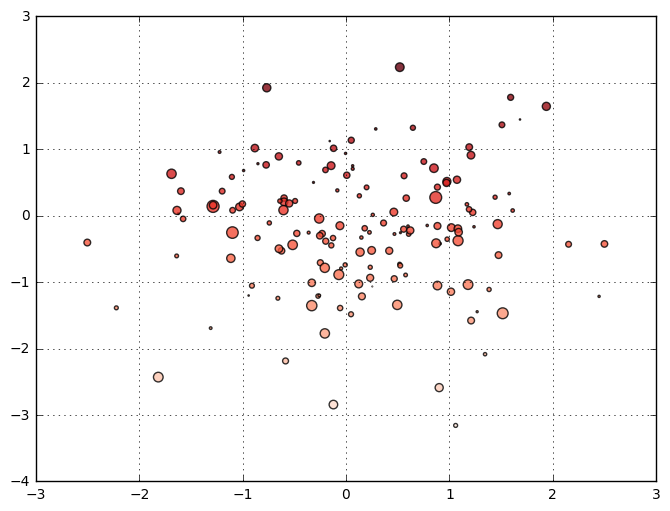

In [15]:
plt.figure(figsize=(8,6))
x = df['nox'].values
y = df['medv'].values
plt.scatter(x,y,marker='.',
           cmap = 'Reds',
           c = y,
           alpha = 0.8,)
plt.grid()

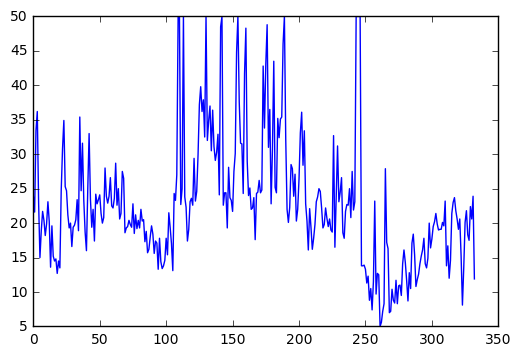

In [43]:
x = df['tax'].values
y = df['medv'].values
plt.plot(x, y)
写出算法报告